#  Covid 19 Time Series Using FB Prophet

### Import Libraries

In [3]:
!pip install cufflinks

  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68739 sha256=ec28d04cb1f9040d4c3beb1981381be7c3132d35e64fa69ebbb1a6b6a856e368
  Stored in directory: c:\users\cash crusaders\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [2]:
!pip install plotly

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

# Manipulating the default plot size
plt.rcParams['figure.figsize']=25,18
import warnings
warnings.filterwarnings('ignore')

In [5]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

### Import Dataset

In [6]:
df = pd.read_csv(r'Dataset\covid_19_data.csv')

In [7]:
# browse the dataset using its head
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [8]:
# check the tail of the dataset
df.tail()

SNo ObservationDate     Province/State  Country/Region  \
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0

### EDA (Exploratory Data Analysis)

In [10]:
# change the colummn names for state\prvince --> state, country\region  --> country
df.rename(columns = {'Province/State':'State'}, inplace = True)
df.rename(columns = {'Country/Region':'Country'}, inplace = True)

In [11]:
df.head()

SNo ObservationDate      State         Country      Last Update  Confirmed  \
0    1      01/22/2020      Anhui  Mainland China  1/22/2020 17:00        1.0   
1    2      01/22/2020    Beijing  Mainland China  1/22/2020 17:00       14.0   
2    3      01/22/2020  Chongqing  Mainland China  1/22/2020 17:00        6.0   
3    4      01/22/2020     Fujian  Mainland China  1/22/2020 17:00        1.0   
4    5      01/22/2020      Gansu  Mainland China  1/22/2020 17:00        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [13]:
# get info about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   State            228329 non-null  object 
 3   Country          306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [15]:
# get the description of the dataset
df.describe().T

count           mean            std       min      25%  \
SNo        306429.0  153215.000000   88458.577156       1.0  76608.0   
Confirmed  306429.0   85670.911559  277551.604043 -302844.0   1042.0   
Deaths     306429.0    2036.403268    6410.938048    -178.0     13.0   
Recovered  306429.0   50420.286304  201512.447838 -854405.0     11.0   

                50%       75%        max  
SNo        153215.0  229822.0   306429.0  
Confirmed   10375.0   50752.0  5863138.0  
Deaths        192.0    1322.0   112385.0  
Recovered    1751.0   20270.0  6399531.0

In [16]:
# from the above information State has some missing values, lets look at all the columns
df.isnull().sum()

SNo                    0
ObservationDate        0
State              78100
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [17]:
# lets visualize the dataset

### Data Visualization

In [19]:
# group the confirmed cases by the observation data
confirmed_table = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed_table

ObservationDate   Confirmed
0        01/01/2021  84092619.0
1        01/02/2021  84718978.0
2        01/03/2021  85251774.0
3        01/04/2021  85805892.0
4        01/05/2021  86546014.0
..              ...         ...
489      12/27/2020  80912611.0
490      12/28/2020  81408934.0
491      12/29/2020  82073362.0
492      12/30/2020  82834592.0
493      12/31/2020  83559601.0

[494 rows x 2 columns]

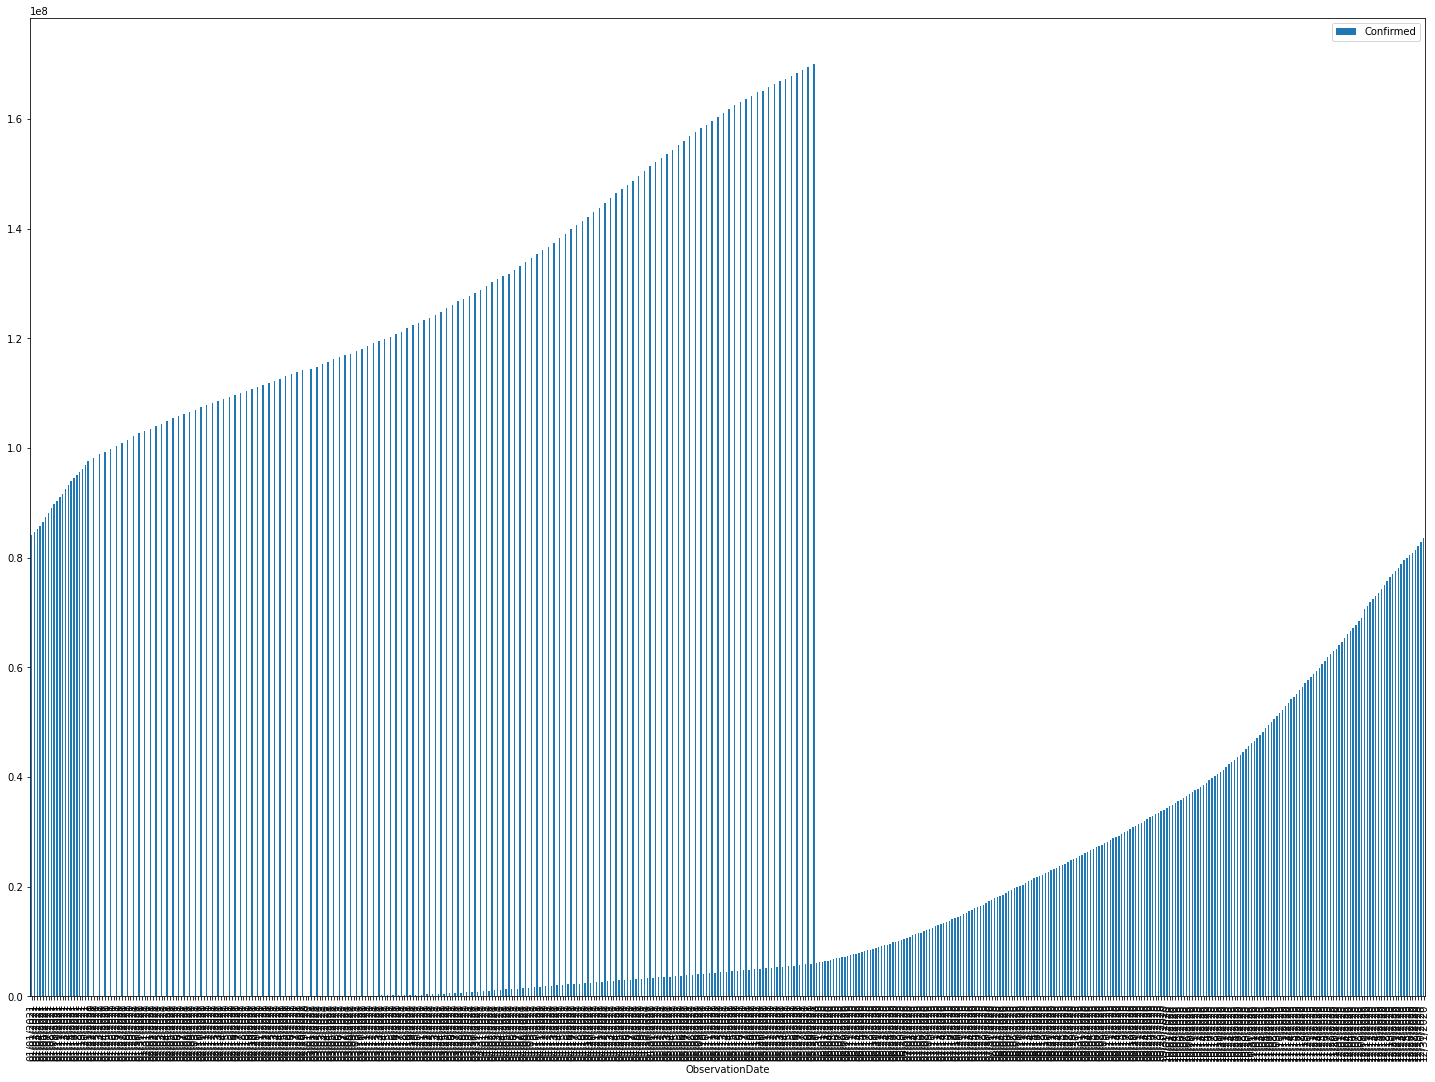

In [25]:
# use pandas for Viz
confirmed_table.plot(kind='bar',x='ObservationDate',y='Confirmed')
plt.show()

In [23]:
# viz using plotly
confirmed_table.iplot(kind='bar',x='ObservationDate',y='Confirmed',xTitle='ObservationDate',yTitle="Confirmed")

In [26]:
# group Deaths by observatioin Date
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths

ObservationDate     Deaths
0        01/01/2021  1834675.0
1        01/02/2021  1843108.0
2        01/03/2021  1850449.0
3        01/04/2021  1860598.0
4        01/05/2021  1875953.0
..              ...        ...
489      12/27/2020  1771659.0
490      12/28/2020  1781415.0
491      12/29/2020  1796786.0
492      12/30/2020  1811843.0
493      12/31/2020  1825012.0

[494 rows x 2 columns]

In [27]:
deaths.iplot(kind='bar',x='ObservationDate',y='Deaths',xTitle='ObservationDate',yTitle="Deaths")

In [28]:
# group recovered by observation data
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

ObservationDate   Recovered
0        01/01/2021  47313005.0
1        01/02/2021  47614297.0
2        01/03/2021  47882779.0
3        01/04/2021  48173187.0
4        01/05/2021  48488548.0
..              ...         ...
489      12/27/2020  45717710.0
490      12/28/2020  46016136.0
491      12/29/2020  46369231.0
492      12/30/2020  46757476.0
493      12/31/2020  47032627.0

[494 rows x 2 columns]

In [29]:
# iPlot
recovered.iplot(kind='bar',x='ObservationDate',y='Recovered',xTitle='ObservationDate',yTitle="Recovered")

### Making Predictions using FB Prophet

In [30]:
!pip install fbprophet

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Public\Documents\anaconda3\envs\myenv\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Cash Crusaders\\AppData\\Local\\Temp\\pip-install-u5lin_en\\fbprophet_0b6e04db953241b08534f76045f2ac59\\setup.py'"'"'; __file__='"'"'C:\\Users\\Cash Crusaders\\AppData\\Local\\Temp\\pip-install-u5lin_en\\fbprophet_0b6e04db953241b08534f76045f2ac59\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Cash Crusaders\AppData\Local\Temp\pip-wheel-niv392ba'
       cwd: C:\Users\Cash Crusaders\AppData\Local\Temp\pip-install-u5lin_en\fbprophet_0b6e04db953241b08534f76045f2ac59\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running bu

  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730988 sha256=95f917213c2974d48f6898c6b2024218c6ae8021d177dc842e07284c5f443cef
  Stored in directory: c:\users\cash crusaders\appdata\local\pip\cache\wheels\33\3d\82\4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: still running...
    Running setup.py install for fbprophet: finished with status 'done'


In [31]:
from fbprophet import Prophet

In [32]:
df.head()

SNo ObservationDate      State         Country      Last Update  Confirmed  \
0    1      01/22/2020      Anhui  Mainland China  1/22/2020 17:00        1.0   
1    2      01/22/2020    Beijing  Mainland China  1/22/2020 17:00       14.0   
2    3      01/22/2020  Chongqing  Mainland China  1/22/2020 17:00        6.0   
3    4      01/22/2020     Fujian  Mainland China  1/22/2020 17:00        1.0   
4    5      01/22/2020      Gansu  Mainland China  1/22/2020 17:00        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [46]:
# time series needs two columns to be able to spot the trends, seasonality etc.
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [34]:
onfirmed.head(10)

ObservationDate   Confirmed
0      01/01/2021  84092619.0
1      01/02/2021  84718978.0
2      01/03/2021  85251774.0
3      01/04/2021  85805892.0
4      01/05/2021  86546014.0
5      01/06/2021  87329386.0
6      01/07/2021  88210223.0
7      01/08/2021  89013445.0
8      01/09/2021  89774439.0
9      01/10/2021  90363573.0

In [35]:
deaths.head(10)

ObservationDate     Deaths
0      01/01/2021  1834675.0
1      01/02/2021  1843108.0
2      01/03/2021  1850449.0
3      01/04/2021  1860598.0
4      01/05/2021  1875953.0
5      01/06/2021  1891006.0
6      01/07/2021  1905926.0
7      01/08/2021  1921092.0
8      01/09/2021  1933877.0
9      01/10/2021  1942225.0

In [36]:
recovered.head(10)

ObservationDate   Recovered
0      01/01/2021  47313005.0
1      01/02/2021  47614297.0
2      01/03/2021  47882779.0
3      01/04/2021  48173187.0
4      01/05/2021  48488548.0
5      01/06/2021  48801673.0
6      01/07/2021  49125604.0
7      01/08/2021  49422867.0
8      01/09/2021  49753112.0
9      01/10/2021  50023662.0

In [48]:
# Start with confirmed cases, change the columns to be date stamp and y value for prediction
confirmed.columns = ['ds','y']
onfirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [43]:
onfirmed.head(200)

ds            y
0   2021-01-01   84092619.0
1   2021-01-02   84718978.0
2   2021-01-03   85251774.0
3   2021-01-04   85805892.0
4   2021-01-05   86546014.0
..         ...          ...
195 2021-04-18  141404998.0
196 2020-04-19    2400898.0
197 2021-04-19  142098420.0
198 2020-04-20    2471984.0
199 2021-04-20  142952845.0

[200 rows x 2 columns]

In [39]:
onfirmed.tail()

ds           y
489 2020-12-27  80912611.0
490 2020-12-28  81408934.0
491 2020-12-29  82073362.0
492 2020-12-30  82834592.0
493 2020-12-31  83559601.0

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Forecasting number of confirmed cases.

### Model Training

In [49]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Model Prediction

In [50]:
future = model.make_future_dataframe(periods=131)

In [51]:
future.tail(20)

ds
605 2021-09-18
606 2021-09-19
607 2021-09-20
608 2021-09-21
609 2021-09-22
610 2021-09-23
611 2021-09-24
612 2021-09-25
613 2021-09-26
614 2021-09-27
615 2021-09-28
616 2021-09-29
617 2021-09-30
618 2021-10-01
619 2021-10-02
620 2021-10-03
621 2021-10-04
622 2021-10-05
623 2021-10-06
624 2021-10-07

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [52]:
forecast = model.predict(future)

In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

ds          yhat    yhat_lower    yhat_upper
485 2021-05-21 163837902.098 161802716.282 165725531.787
486 2021-05-22 164455674.057 162307910.905 166462723.484
487 2021-05-23 165009742.081 162976231.918 166983821.935
488 2021-05-24 165577986.597 163562293.261 167566591.814
489 2021-05-25 166199600.165 164323923.937 168242705.750
490 2021-05-26 166857431.464 164819080.243 168775404.241
491 2021-05-27 167529242.132 165514708.968 169509322.617
492 2021-05-28 168190979.152 166330522.927 170293259.649
493 2021-05-29 168808751.111 166941351.975 170771221.865
494 2021-05-30 169362819.135 167513324.577 171431262.053
495 2021-05-31 169931063.651 168170479.403 171881349.708
496 2021-06-01 170552677.219 168486679.405 172525259.107
497 2021-06-02 171210508.518 169216328.776 173201434.531
498 2021-06-03 171882319.186 169933829.321 173866312.830
499 2021-06-04 172544056.206 170427675.824 174545017.016
500 2021-06-05 173161828.165 170971115.777 175227899.346
501 2021-06-06 173715896.189 171585933.072 175740863.041
502 2021-06-07 174284140.705 172241952.345 176526390.459
503 2021-06-08 174905754.272 172649731.754 177206362.147
504 2021-06-09 175563585.571 173431492.135 177770721.509
505 2021-06-10 176235396.239 173844369.899 178375652.997
506 2021-06-11 176897133.260 174767174.289 179058824.085
507 2021-06-12 177514905.219 175133388.538 179668987.398
508 2021-06-13 178068973.242 175478176.108 180381615.587
509 2021-06-14 178637217.758 176049561.744 180833574.017
510 2021-06-15 179258831.326 176804611.934 181611354.035
511 2021-06-16 179916662.625 177214555.321 182446838.158
512 2021-06-17 180588473.293 177998413.409 183157589.469
513 2021-06-18 181250210.314 178369757.516 184239980.092
514 2021-06-19 181867982.273 178786341.379 184610388.056
515 2021-06-20 182422050.296 179208779.624 185497017.090
516 2021-06-21 182990294.812 179791373.028 186421023.191
517 2021-06-22 183611908.380 179967810.632 186867212.150
518 2021-06-23 184269739.679 180851307.315 187685576.452
519 2021-06-24 184941550.347 181006791.277 188216357.997
520 2021-06-25 185603287.367 181872372.031 189256527.100
521 2021-06-26 186221059.326 182046610.828 189906931.572
522 2021-06-27 186775127.350 182459751.203 190589646.145
523 2021-06-28 187343371.866 182498969.518 191646917.608
524 2021-06-29 187964985.434 183058961.229 192230959.525
525 2021-06-30 188622816.733 183298637.950 193192323.727
526 2021-07-01 189294627.401 183846896.380 193883002.157
527 2021-07-02 189956364.421 184333179.568 194804902.408
528 2021-07-03 190574136.380 185027725.044 195533817.697
529 2021-07-04 191128204.404 185082793.530 196230131.359
530 2021-07-05 191696448.920 184993250.904 196845323.942
531 2021-07-06 192318062.488 186001273.688 197703626.500
532 2021-07-07 192975893.787 186309387.324 198635198.498
533 2021-07-08 193647704.455 186356599.800 199664229.875
534 2021-07-09 194309441.475 186965669.818 200363518.995
535 2021-07-10 194927213.434 187517924.633 201551675.553
536 2021-07-11 195481281.458 188055093.893 202383085.528
537 2021-07-12 196049525.974 188113881.048 202739614.072
538 2021-07-13 196671139.541 188233781.060 204263992.531
539 2021-07-14 197328970.840 188784156.261 204692608.867
540 2021-07-15 198000781.509 189518650.210 205785561.645
541 2021-07-16 198662518.529 189266075.006 206280422.218
542 2021-07-17 199280290.488 190238764.676 207037845.388
543 2021-07-18 199834358.511 190451221.777 208167711.988
544 2021-07-19 200402603.027 190379046.598 208750896.786
545 2021-07-20 201024216.595 190961245.454 210223220.854
546 2021-07-21 201682047.894 191360638.842 210760217.281
547 2021-07-22 202353858.562 192239693.394 211761738.371
548 2021-07-23 203015595.583 191845882.883 212328097.576
549 2021-07-24 203633367.542 192943515.152 213489204.583
550 2021-07-25 204187435.565 192851988.014 214243999.548
551 2021-07-26 204755680.081 193308637.146 215704286.822
552 2021-07-27 205377293.649 193870696.638 215838342.937
553 2021-07-28 206035124.948 194325258.516 216869343.078
554 2021-07-29 2067069

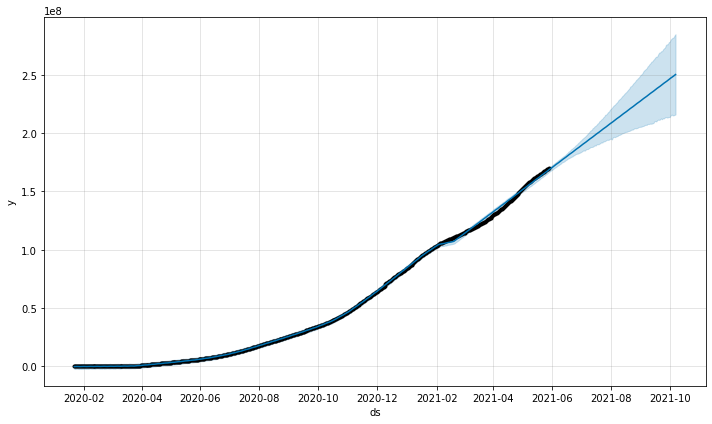

In [54]:
# plot the forecast
confirmed_forecast_plot = model.plot(forecast)

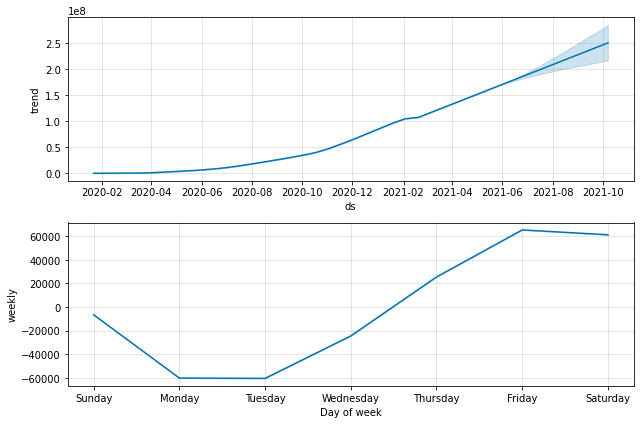

In [55]:
# get the components like trend and seasonality
confirmed_forecast_plot =model.plot_components(forecast)

### Forecasting the number of deaths

In [57]:
deaths.head(10)

ObservationDate      Deaths
0      01/01/2021 1834675.000
1      01/02/2021 1843108.000
2      01/03/2021 1850449.000
3      01/04/2021 1860598.000
4      01/05/2021 1875953.000
5      01/06/2021 1891006.000
6      01/07/2021 1905926.000
7      01/08/2021 1921092.000
8      01/09/2021 1933877.000
9      01/10/2021 1942225.000

In [58]:
# Start with confirmed cases, change the columns to be date stamp and y value for prediction
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [59]:
deaths.head(10)

ds           y
0 2021-01-01 1834675.000
1 2021-01-02 1843108.000
2 2021-01-03 1850449.000
3 2021-01-04 1860598.000
4 2021-01-05 1875953.000
5 2021-01-06 1891006.000
6 2021-01-07 1905926.000
7 2021-01-08 1921092.000
8 2021-01-09 1933877.000
9 2021-01-10 1942225.000

In [60]:
model = Prophet(interval_width=0.95)
model.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future_2 = model.make_future_dataframe(periods=131)

In [63]:
future_2.tail(10)

ds
615 2021-09-28
616 2021-09-29
617 2021-09-30
618 2021-10-01
619 2021-10-02
620 2021-10-03
621 2021-10-04
622 2021-10-05
623 2021-10-06
624 2021-10-07

In [64]:
deaths_forecast = model.predict(future_2)
deaths_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

ds        yhat  yhat_lower  yhat_upper
485 2021-05-21 3411378.933 3385603.947 3435619.657
486 2021-05-22 3421880.775 3397923.379 3446893.924
487 2021-05-23 3430266.636 3406525.413 3453218.470
488 2021-05-24 3439776.827 3414867.762 3464688.804
489 2021-05-25 3451828.608 3427869.541 3476525.936
490 2021-05-26 3464064.178 3439761.883 3488188.804
491 2021-05-27 3476052.454 3449282.429 3499114.609
492 2021-05-28 3487855.431 3462055.512 3511480.841
493 2021-05-29 3498357.273 3473020.444 3523050.542
494 2021-05-30 3506743.134 3479918.260 3532056.984
495 2021-05-31 3516253.324 3492272.629 3540575.380
496 2021-06-01 3528305.106 3503654.146 3552441.572
497 2021-06-02 3540540.675 3514603.154 3564856.192
498 2021-06-03 3552528.952 3526925.586 3577016.978
499 2021-06-04 3564331.929 3539739.694 3590858.790
500 2021-06-05 3574833.770 3548788.753 3603245.779
501 2021-06-06 3583219.631 3554564.899 3608580.806
502 2021-06-07 3592729.822 3566484.899 3622006.536
503 2021-06-08 3604781.604 3574565.613 3633581.282
504 2021-06-09 3617017.173 3586676.504 3645833.601
505 2021-06-10 3629005.450 3594871.900 3661690.124
506 2021-06-11 3640808.427 3602558.218 3671471.079
507 2021-06-12 3651310.268 3616340.965 3684010.537
508 2021-06-13 3659696.129 3625130.646 3692547.530
509 2021-06-14 3669206.320 3630425.266 3706592.938
510 2021-06-15 3681258.101 3638985.457 3718804.670
511 2021-06-16 3693493.671 3655731.234 3734391.946
512 2021-06-17 3705481.948 3660123.559 3748469.062
513 2021-06-18 3717284.924 3669475.644 3763761.581
514 2021-06-19 3727786.766 3682631.140 3771182.861
515 2021-06-20 3736172.627 3680560.969 3788590.310
516 2021-06-21 3745682.818 3691801.278 3799032.639
517 2021-06-22 3757734.599 3698044.746 3812881.308
518 2021-06-23 3769970.169 3711114.188 3826431.732
519 2021-06-24 3781958.445 3721485.740 3838715.367
520 2021-06-25 3793761.422 3726376.244 3858970.206
521 2021-06-26 3804263.264 3730311.705 3868669.339
522 2021-06-27 3812649.125 3739377.329 3882441.600
523 2021-06-28 3822159.315 3746866.963 3891506.284
524 2021-06-29 3834211.097 3750789.764 3911998.753
525 2021-06-30 3846446.666 3766785.058 3922154.818
526 2021-07-01 3858434.943 3768089.128 3941388.195
527 2021-07-02 3870237.920 3769531.944 3956068.123
528 2021-07-03 3880739.761 3782162.948 3972549.452
529 2021-07-04 3889125.622 3787988.314 3984676.000
530 2021-07-05 3898635.813 3795838.169 4001041.364
531 2021-07-06 3910687.595 3804777.875 4012000.428
532 2021-07-07 3922923.164 3808257.162 4032066.182
533 2021-07-08 3934911.441 3819999.650 4040685.143
534 2021-07-09 3946714.418 3822690.207 4052459.937
535 2021-07-10 3957216.259 3836408.157 4073899.869
536 2021-07-11 3965602.120 3838189.482 4087488.027
537 2021-07-12 3975112.311 3839130.438 4102356.237
538 2021-07-13 3987164.092 3854541.060 4116633.416
539 2021-07-14 3999399.662 3853295.119 4137489.063
540 2021-07-15 4011387.939 3866471.524 4147927.374
541 2021-07-16 4023190.915 3873609.547 4159966.447
542 2021-07-17 4033692.757 3878103.509 4178074.934
543 2021-07-18 4042078.618 3884123.274 4193317.545
544 2021-07-19 4051588.809 3886011.898 4203927.557
545 2021-07-20 4063640.590 3891819.995 4228397.518
546 2021-07-21 4075876.160 3896616.116 4234769.675
547 2021-07-22 4087864.436 3908995.963 4252569.532
548 2021-07-23 4099667.413 3923579.085 4270313.488
549 2021-07-24 4110169.255 3922392.641 4288918.688
550 2021-07-25 4118555.116 3930870.142 4300483.659
551 2021-07-26 4128065.306 3934066.384 4307335.357
552 2021-07-27 4140117.088 3941228.566 4324670.602
553 2021-07-28 4152352.657 3950793.403 4346871.295
554 2021-07-29 4164340.934 3958697.946 4367056.521
555 2021-07-30 4176143.911 3956841.230 4375988.360
556 2021-07-31 4186645.752 3972146.363 4388297.146
557 2021-08-01 4195031.613 3973187.128 4411354.985
558 2021-08-02 4204541.804 3967743.676 4420393.803
559 2021-08-03 4216593.586 3990421.717 4441336.059
560 2021-08-04 4228829.155 3994843.058 4454998.150
561 2021-08-05 4240817.432 4002264.071 4469394.132
562 2021-08-06 4252620.409 4008712

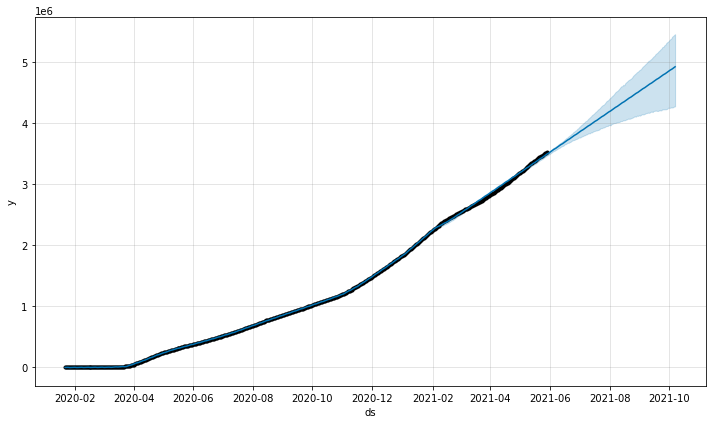

In [66]:
# plot the forecast
deaths_forecast_plot = model.plot(deaths_forecast)

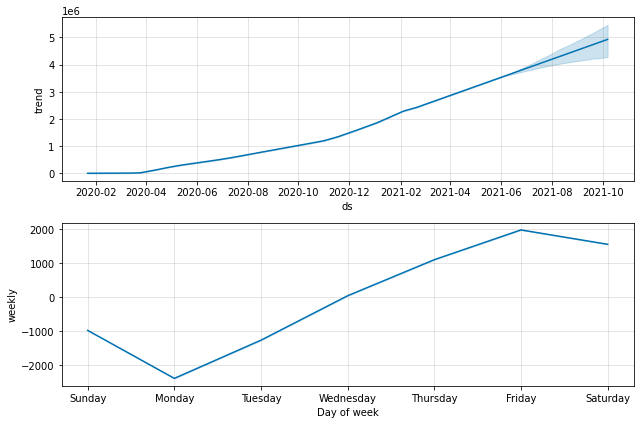

In [67]:
# get the components like trend and seasonality
deaths_forecast_plot =model.plot_components(deaths_forecast)

### Forecast number of recovered cases

In [68]:
recovered.head(10)

ObservationDate    Recovered
0      01/01/2021 47313005.000
1      01/02/2021 47614297.000
2      01/03/2021 47882779.000
3      01/04/2021 48173187.000
4      01/05/2021 48488548.000
5      01/06/2021 48801673.000
6      01/07/2021 49125604.000
7      01/08/2021 49422867.000
8      01/09/2021 49753112.000
9      01/10/2021 50023662.000

In [69]:
# Start with confirmed cases, change the columns to be date stamp and y value for prediction
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [70]:
recovered.head(10)

ds            y
0 2021-01-01 47313005.000
1 2021-01-02 47614297.000
2 2021-01-03 47882779.000
3 2021-01-04 48173187.000
4 2021-01-05 48488548.000
5 2021-01-06 48801673.000
6 2021-01-07 49125604.000
7 2021-01-08 49422867.000
8 2021-01-09 49753112.000
9 2021-01-10 50023662.000

In [71]:
model = Prophet(interval_width=0.95)
model.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future_3 = model.make_future_dataframe(periods=131)

In [73]:
future_3.head(10)

ds
0 2020-01-22
1 2020-01-23
2 2020-01-24
3 2020-01-25
4 2020-01-26
5 2020-01-27
6 2020-01-28
7 2020-01-29
8 2020-01-30
9 2020-01-31

In [74]:
recovered_forecast = model.predict(future_3)
recovered_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

ds          yhat    yhat_lower    yhat_upper
485 2021-05-21  98335168.607  95435485.823 101211870.567
486 2021-05-22  98806988.600  95892963.174 101504834.873
487 2021-05-23  99157005.893  96397878.583 101882278.637
488 2021-05-24  99598791.237  96791852.584 102426927.027
489 2021-05-25  99970689.035  97024771.835 102786758.337
490 2021-05-26 100434163.634  97389451.917 103245244.460
491 2021-05-27 100884341.876  98202351.654 103747346.513
492 2021-05-28 101325065.236  98497585.264 104012146.438
493 2021-05-29 101796885.230  98828791.295 104743630.900
494 2021-05-30 102146902.522  99329826.332 104943510.762
495 2021-05-31 102588687.867  99819052.268 105556607.395
496 2021-06-01 102960585.664 100170037.588 105707181.261
497 2021-06-02 103424060.264 100632214.260 106108625.510
498 2021-06-03 103874238.506 101068730.332 106897328.061
499 2021-06-04 104314961.866 101362571.597 107308611.904
500 2021-06-05 104786781.859 102084825.962 107566374.096
501 2021-06-06 105136799.152 102467954.105 108032663.249
502 2021-06-07 105578584.496 102338671.477 108523023.438
503 2021-06-08 105950482.294 103115647.849 108904620.226
504 2021-06-09 106413956.893 103532860.034 109273732.610
505 2021-06-10 106864135.135 104064729.534 109829841.116
506 2021-06-11 107304858.495 104591438.479 110104024.822
507 2021-06-12 107776678.489 104713313.354 110599145.638
508 2021-06-13 108126695.781 105109615.756 111003918.722
509 2021-06-14 108568481.126 105840942.001 111438121.331
510 2021-06-15 108940378.923 106353783.594 111727733.163
511 2021-06-16 109403853.523 106526138.868 112272653.052
512 2021-06-17 109854031.765 106933309.597 112683197.950
513 2021-06-18 110294755.125 107316792.495 113229854.956
514 2021-06-19 110766575.118 107930438.954 113674717.344
515 2021-06-20 111116592.410 107911516.299 113928245.253
516 2021-06-21 111558377.755 108507229.070 114563924.239
517 2021-06-22 111930275.552 108770380.692 115384789.323
518 2021-06-23 112393750.152 109263519.649 115398979.834
519 2021-06-24 112843928.394 109749513.063 115848799.750
520 2021-06-25 113284651.754 110292193.330 116437977.462
521 2021-06-26 113756471.747 110764958.610 116803551.456
522 2021-06-27 114106489.040 111140005.610 117122893.649
523 2021-06-28 114548274.385 111138574.283 117726211.758
524 2021-06-29 114920172.182 111753592.118 118101921.728
525 2021-06-30 115383646.781 112240769.957 118657556.142
526 2021-07-01 115833825.023 112575781.379 119000452.432
527 2021-07-02 116274548.384 112851066.413 119624376.406
528 2021-07-03 116746368.377 113359436.662 119988901.701
529 2021-07-04 117096385.669 113616019.595 120290167.896
530 2021-07-05 117538171.014 114299057.191 121007558.489
531 2021-07-06 117910068.811 114425182.722 121088344.998
532 2021-07-07 118373543.411 114938842.637 121998263.831
533 2021-07-08 118823721.653 115411502.673 121989791.620
534 2021-07-09 119264445.013 115545416.339 122796798.365
535 2021-07-10 119736265.006 116226140.645 123208174.254
536 2021-07-11 120086282.299 116669176.762 123889373.553
537 2021-07-12 120528067.643 116821473.152 124338794.716
538 2021-07-13 120899965.441 117239873.981 124607256.800
539 2021-07-14 121363440.040 117427484.591 125444872.418
540 2021-07-15 121813618.282 118153122.209 125581005.310
541 2021-07-16 122254341.642 118347472.167 126068780.483
542 2021-07-17 122726161.636 118701410.585 126764277.616
543 2021-07-18 123076178.928 119290643.646 127390944.955
544 2021-07-19 123517964.273 119470025.891 127623807.277
545 2021-07-20 123889862.070 119915831.849 128020651.787
546 2021-07-21 124353336.670 119809083.043 128698435.496
547 2021-07-22 124803514.912 120616702.204 129540529.240
548 2021-07-23 125244238.272 120631319.591 129960827.406
549 2021-07-24 125716058.265 120854803.351 130183465.139
550 2021-07-25 126066075.558 121277554.046 130614015.952
551 2021-07-26 126507860.902 122193919.876 131082266.097
552 2021-07-27 126879758.700 122486553.204 131662273.307
553 2021-07-28 127343233.299 122575553.212 131723891.906
554 2021-07-29 1277934

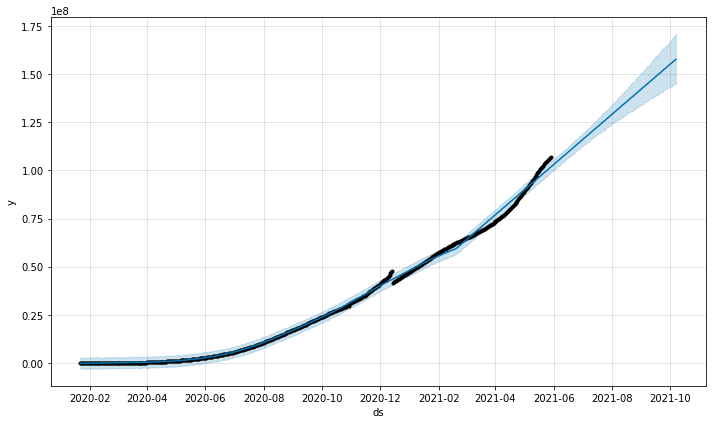

In [75]:
# plot the forecast
recovered_forecast_plot = model.plot(recovered_forecast)

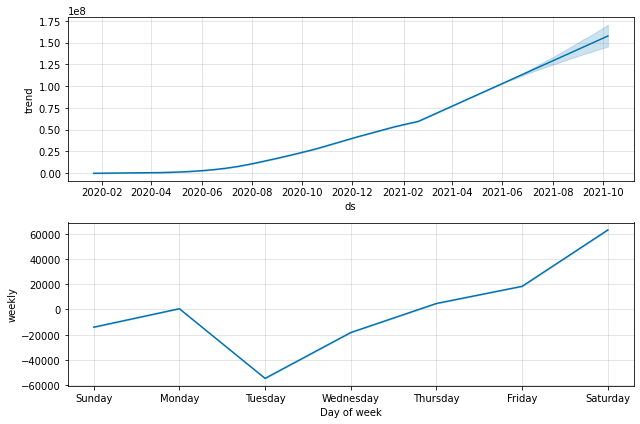

In [76]:
# get the components like trend and seasonality
recovered_forecast_plot =model.plot_components(recovered_forecast)